In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# **Introduction** #

As a team, our goal for the Final Project was to determine the best neighborhood in Pittsburgh using typical **Quality of Life** metrics.

In a city, there are many factors that may be overlooked, but are crucial to an individuals quality of life. For example, if a city was riddled with crime, it may not foster a comforting, "home-y" feeling. As a group, we felt that the idea of quality of life was the most decisive factor in a good neighborhood.

We approached the creation of an all-encompassing quality of life metric by first choosing statistics/details that may indicate a person's quality of life in any given city (e.g., poverty rate, police incidents, park acreage). We visualized these submetrics to get an accurate representation of which city in Pittsburgh performed the best in each respective category.

In order to combine these submetrics into a single **Quality of Life** metric, we deliberated on which of the submetrics may be the most impactful in the quality of life of individuals. We discussed many alternative weights, and occasionally held different views on which submetrics held importance over others (e.g., whether an impoverished community or a crime-filled community would lead to lower quality of life), but we ultimately settled on a hierarchy of factors that contribute to quality of life, most-to-least: poverty status, police incidents, median home value, park acres, and playgrounds per city.

# **Metric** #

As alluded to above, our metric is the overall **Quality of Life** for individuals living in different Pittsburgh neigherhoods. In determining this, we are measuring poverty status, police incidents, median home value, park acres, and playgrounds per city.

Here are the datasets we are using:

[Poverty Status](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/7996d143-c155-466e-8414-115f74997dd7)

[Police Incidents](https://data.wprdc.org/dataset/uniform-crime-reporting-data)

Median Home Value + Park Acres - [Neighborhood Data](https://data.wprdc.org/dataset/neighborhoods2)

[Playgrounds](https://data.wprdc.org/dataset/playgrounds)


### **Submetrics**

**James - Neighborhood Data**

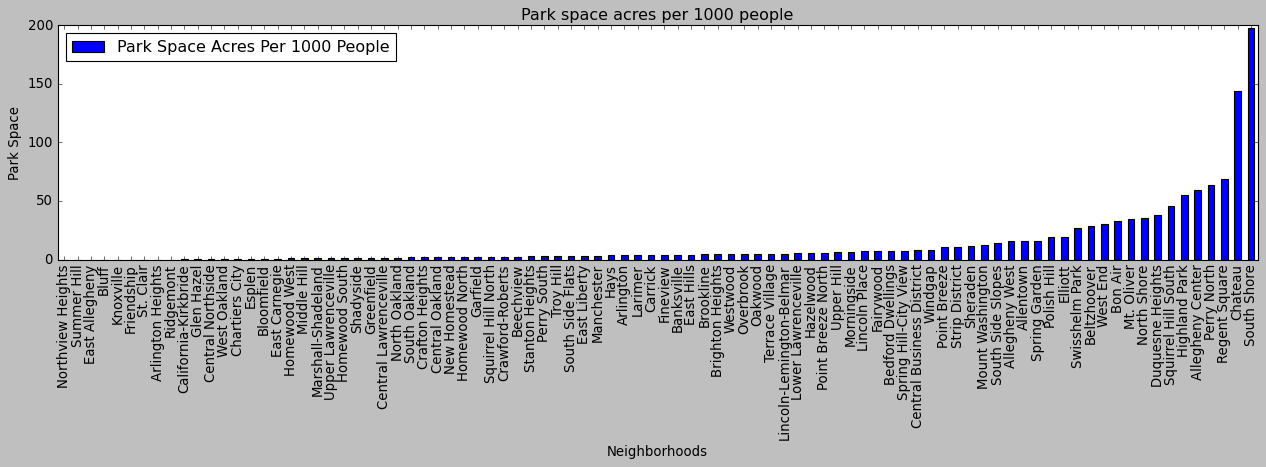

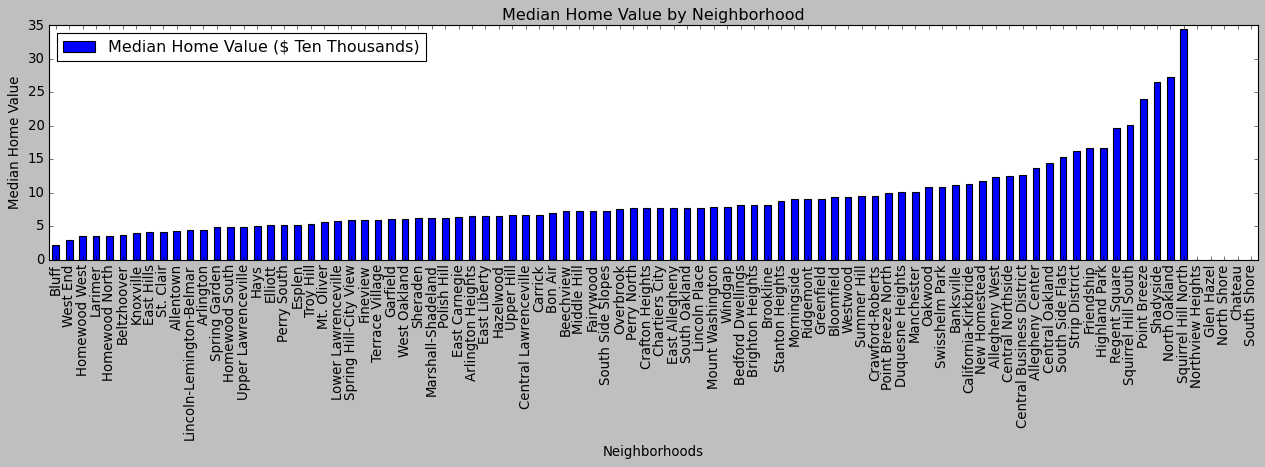

In [14]:
df = pd.read_csv("datasets/neighborhoodData.csv")
df = df[["Median Home Value ($ Ten Thousands)", "Neighborhood_2010_HOOD", "Park Space Acres Per 1000 People"]]
df["Median Home Value ($ Ten Thousands)"]=df["Median Home Value ($ Ten Thousands)"].replace('[\$,]', '', regex=True).astype(float)
df["Median Home Value ($ Ten Thousands)"]=df["Median Home Value ($ Ten Thousands)"].divide(10000)
df=df.sort_values(by="Park Space Acres Per 1000 People")
james1=df#.dropna(subset="Park Space Acres Per 1000 People")
james1.plot(
    kind="bar",
    x="Neighborhood_2010_HOOD",
    y=["Park Space Acres Per 1000 People"], 
    title="Park space acres per 1000 people",
    figsize=(16,6)
)
plt.xlabel("Neighborhoods")
plt.ylabel("Park Space")
plt.tight_layout()
plt.show()
james2=df#.dropna(subset="Median Home Value ($ Ten Thousands)")
james2=james2.sort_values(by="Median Home Value ($ Ten Thousands)")
james2.plot(
    kind="bar",
    x="Neighborhood_2010_HOOD",
    y="Median Home Value ($ Ten Thousands)",
    title = "Median Home Value by Neighborhood",
    figsize=(16,6)
)
plt.xlabel("Neighborhoods")
plt.ylabel("Median Home Value")
plt.tight_layout()
plt.show()

**Ethan - Police Incidents**

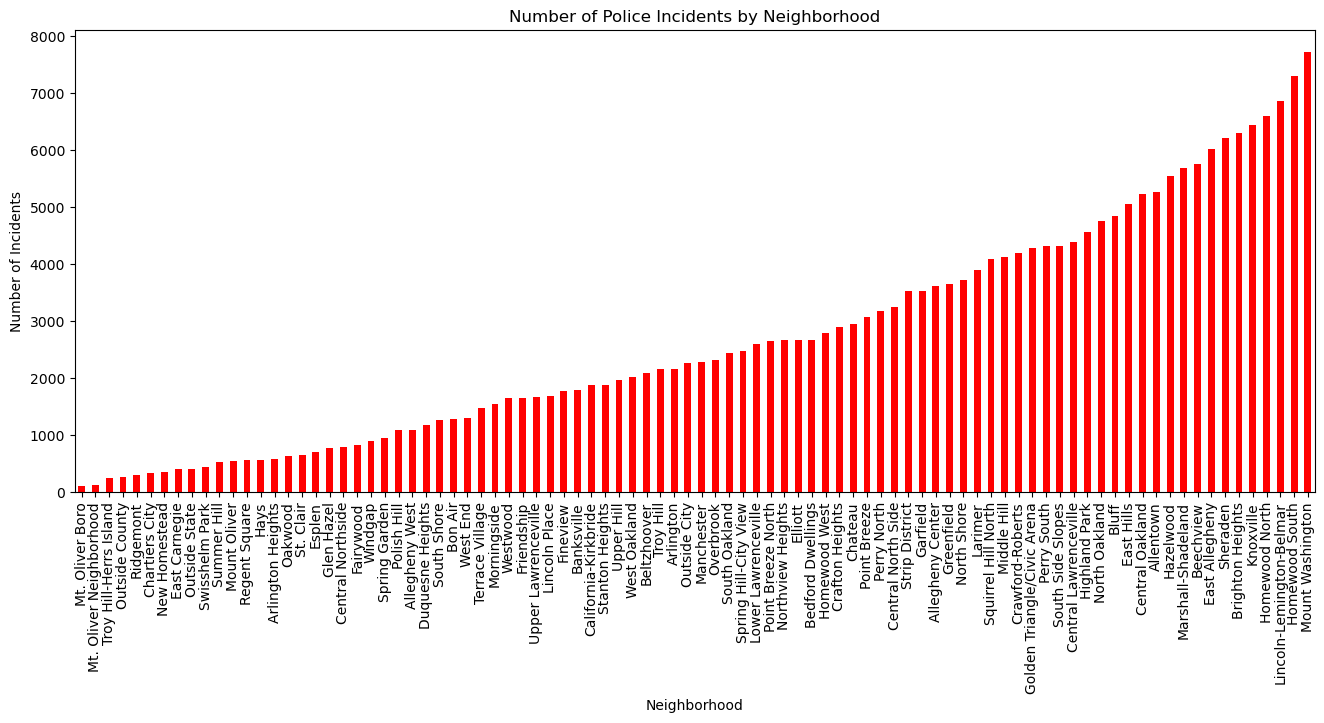

In [7]:
df = pd.read_csv("datasets/police_incidents.csv")
counts = df["INCIDENTNEIGHBORHOOD"].value_counts().nsmallest(90).sort_values()
ethan = counts
ethan=ethan.to_frame("Incidents")
counts.plot.bar(
    figsize=(16, 6), 
    title="Number of Police Incidents by Neighborhood",
    xlabel="Neighborhood",
    ylabel ="Number of Incidents",
    rot=90,
    color="red"
)
plt.show()

Based on this metric, the best neighborhood is **Mt. Oliver Boro** due to having the least number of police incidents out of all neighborhoods. The number of police incidents is extremely important in determining the best neighborhood as safety is a crucial factor in determining the quality of life in an area.

**Sam M - Playgrounds**

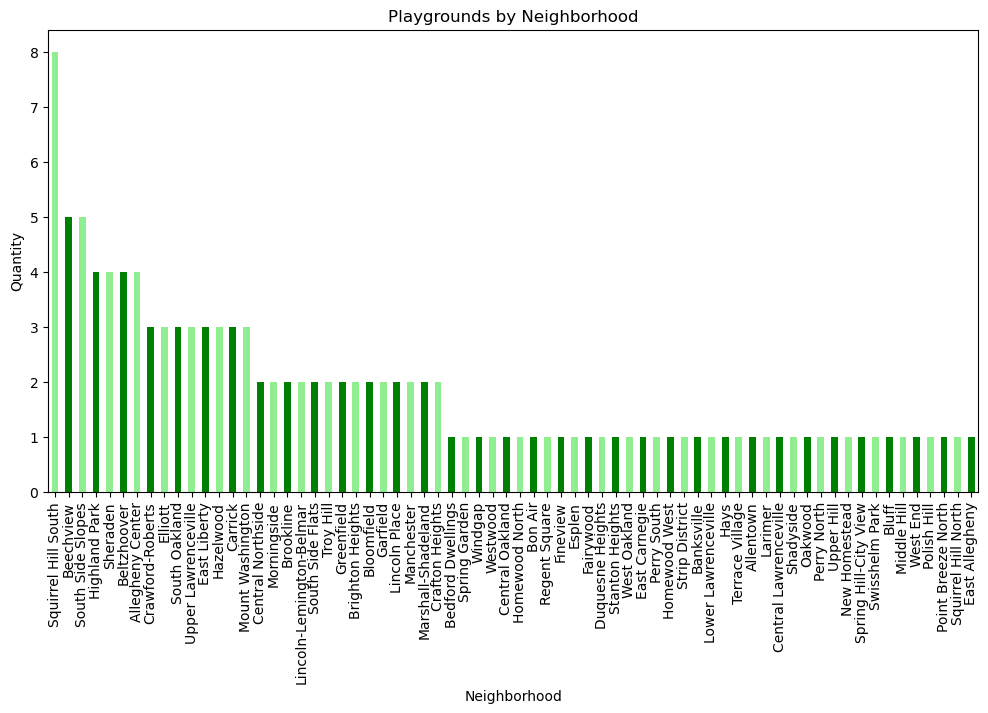

In [8]:
df = pd.read_csv("datasets/pitt-playgrounds.csv")
playgrounds = df["neighborhood"].value_counts()
samm = playgrounds
playgrounds.plot.bar(
    figsize=(12, 6),
    title="Playgrounds by Neighborhood",
    xlabel="Neighborhood",
    ylabel="Quantity",
    color=["lightgreen", "green"],
    rot=90
)
plt.show()

Public playgrounds have proven to be important for child development, allowing them to socialize in a safe space other than at school. They increase physical activity, and have positive effects on social and mental health. Playgrounds also provide spaces for parents to socialize and alliviate some of the stress of watching their children, improving their quality of life as well.

From our data, we can see that the "best" neighborhood according to this particular sub-metric is **Squirrel Hill South**, with 8 playgrounds. Beechview and South Side Slopes are tied for second with 5 playgrounds each.

**Sam G - Poverty Rate**

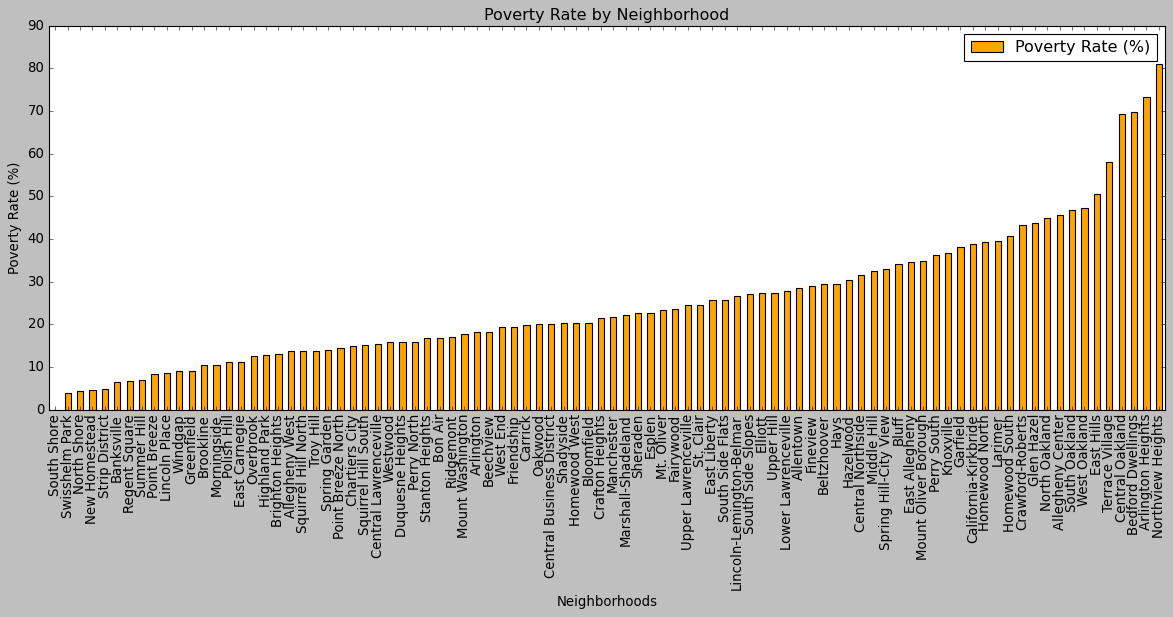

In [9]:
poverty = pd.read_csv("datasets/poverty-status-of-individuals-in-the-past-12-months-by-living-arrangement.csv")
povertyRate = poverty["Estimate; Income in the past 12 months below poverty level:"]/poverty["Estimate; Total:"]
neighborhoods = poverty["Neighborhood"]
povertyRatePerNeighborhood = {'Neighborhoods': neighborhoods,'Poverty Rate (%)': povertyRate}
df = pd.DataFrame(povertyRatePerNeighborhood)
df = df.sort_values("Poverty Rate (%)")
df = df.nsmallest(n=90, columns = "Poverty Rate (%)")
df["Poverty Rate (%)"] = df["Poverty Rate (%)"]*100
plt.style.use('classic')
samg = df
df.plot(kind="bar",
        x="Neighborhoods",
        y="Poverty Rate (%)", 
        title="Poverty Rate by Neighborhood",
        figsize=(18,6), 
        rot = 90,
        color = 'orange')
plt.xlabel("Neighborhoods")
plt.ylabel("Poverty Rate (%)")
plt.show()

Using solely this data/submetric, we can conclude that **South Shore** is the best neighborhood in Pittsburgh. Poverty in a city can lead to greater crime and an overall lower quality of life; a city where there are no impoverished families should correlate to less crime, and an overall happier environment.

## **The Best Neighborhood** ##

Given:
- Police incidents  = $P$
- Poverty Rate = $R$
- Median Home Value = $M$
- Park Acres = $G$
- Playgrounds = $S$

$1(1-R)+.8(1-(\frac{1}{\log_{10}(20000)})(\log_{10}(P+1)))+.5((\frac{1}{\sqrt[3](200)})(\sqrt[3](G)))+.5((\frac{1}{\log_{10}(35)})(\log_{10}(\frac{M}{10000})))+.2(\log_{9}(S+1))$

TO DO: here is formula, now we explain how we got there w the weights and the equations and explain how it will rank each neighborhood. determine best neighborhood, visualize this metric, kachow

In [ ]:
# Poverty Rate
samg["Formula"]=(100-samg["Poverty Rate (%)"])/100
# Police Incidents
ethan=.8*(1-((1/math.log10(20000))*(np.log10(ethan+1))))
# Park Acres
james1["Formula"]=.5*((1/math.pow(200,1/3)))
# Median Home Value
james2["Formula"]=.5*((1/math.log10(35))*(np.log10(james2["Median Home Value ($ Ten Thousands)"])))
# Playground
samm=.2*(np.emath.logn(9,samm+1))
print(samg)
print(ethan)
print(james1)
print(james2)
print(samm)


        Neighborhoods  Poverty Rate (%)   Formula
71        South Shore          0.000000  1.000000
82     Swisshelm Park          3.965785  0.960342
57        North Shore          4.278075  0.957219
55      New Homestead          4.501608  0.954984
80     Strip District          4.789550  0.952104
..                ...               ...       ...
83    Terrace Village         58.088235  0.419118
19    Central Oakland         69.214060  0.307859
6   Bedford Dwellings         69.717707  0.302823
4   Arlington Heights         73.157895  0.268421
58  Northview Heights         80.869565  0.191304

[90 rows x 3 columns]
                          Incidents
INCIDENTNEIGHBORHOOD               
Mt. Oliver Boro            0.754618
Mt. Oliver Neighborhood    0.754620
Troy Hill-Herrs Island     0.754627
Outside County             0.754628
Ridgemont                  0.754629
...                             ...
Knoxville                  0.754664
Homewood North             0.754664
Lincoln-Lemington

## **Conclusions** ##